In [3]:
from __future__ import print_function

In [8]:
!pip install numpy scipy
!pip install resampy tensorflow six
!pip install pysoundfile
!pip install ffmpeg-python
!pip install pydub

In [9]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import random

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import six
import ffmpeg
import os
from pydub import AudioSegment

print(tf.__version__)

1.13.0-rc1


In [5]:
!git clone https://github.com/tensorflow/models.git
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz
!cp models/research/audioset/* .


Cloning into 'models'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 23751 (delta 1), reused 2 (delta 0), pack-reused 23740
Receiving objects: 100% (23751/23751), 505.55 MiB | 10.64 MiB/s, done.
Resolving deltas: 100% (14009/14009), done.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  6608k      0  0:00:43  0:00:43 --:--:-- 11.6M 0     0  5563k      0  0:00:51  0:00:23  0:00:28 5971k   0  0:00:48  0:00:34  0:00:14 6960k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0   136k      0 --:--:-- --:--:-- --:--:--  136k


In [6]:
import vggish_input
import vggish_params
import vggish_postprocess
import vggish_slim


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from vggish_model.ckpt


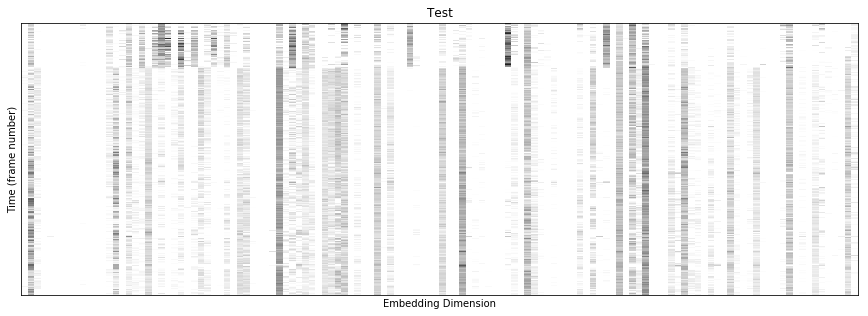

In [10]:
testFileDir = "./"
testFileMp3 = "audio.mp3"
(name,ext) = os.path.splitext(testFileMp3)

audio = AudioSegment.from_mp3(os.path.join(testFileDir,testFileMp3))
audio.export(os.path.join(testFileDir,name+".wav"), format="wav")

testFileWav = os.path.join(testFileDir,name+".wav")

batch = vggish_input.wavfile_to_examples(testFileWav)

with tf.Graph().as_default(), tf.Session() as sess:
  # Define the model in inference mode, load the checkpoint, and
  # locate input and output tensors.
  vggish_slim.define_vggish_slim(training=False)
  vggish_slim.load_vggish_slim_checkpoint(sess, "vggish_model.ckpt")
  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)
  
  [testSamples] = sess.run([embedding_tensor],
                               feed_dict={features_tensor: batch})
    

  
  #postprocessed_batch = pproc.postprocess(embedding_batch)
  
 
  plt.figure(figsize=(15,5))
  plt.subplot(1,1,1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(testSamples, aspect='auto', cmap='binary')

  plt.xlabel('Embedding Dimension')
  plt.ylabel('Time (frame number)')
  plt.title("Test")

In [13]:
model = keras.models.load_model('my_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_2 (Dense)              (None, 245)               31605     
Total params: 33,789
Trainable params: 33,789
Non-trainable params: 0
_________________________________________________________________


In [14]:
test = np.array(testSamples)
predictions = model.predict(test)
for ndx, member in enumerate(predictions):
    print(ndx,  np.argmax(member), ndx*0.96)

0 0 0.0
1 1 0.96
2 3 1.92
3 3 2.88
4 0 3.84
5 3 4.8
6 1 5.76
7 1 6.72
8 3 7.68
9 3 8.64
10 3 9.6
11 0 10.559999999999999
12 0 11.52
13 3 12.48
14 3 13.44
15 0 14.399999999999999
16 3 15.36
17 0 16.32
18 3 17.28
19 0 18.24
20 3 19.2
21 3 20.16
22 0 21.119999999999997
23 0 22.08
24 3 23.04
25 0 24.0
26 0 24.96
27 3 25.919999999999998
28 3 26.88
29 3 27.84
30 0 28.799999999999997
31 3 29.759999999999998
32 3 30.72
33 3 31.68
34 3 32.64
35 3 33.6
36 0 34.56
37 3 35.519999999999996
38 3 36.48
39 2 37.44
40 3 38.4
41 3 39.36
42 3 40.32
43 2 41.28
44 3 42.239999999999995
45 3 43.199999999999996
46 3 44.16
47 3 45.12
48 2 46.08
49 3 47.04
50 2 48.0
51 3 48.96
52 5 49.92
53 5 50.879999999999995
54 5 51.839999999999996
55 5 52.8
56 5 53.76
57 5 54.72
58 5 55.68
59 5 56.64
60 5 57.599999999999994
61 5 58.559999999999995
62 5 59.519999999999996
63 5 60.48
64 5 61.44
65 5 62.4
66 5 63.36
67 5 64.32
68 5 65.28
69 5 66.24
70 5 67.2
71 5 68.16
72 5 69.12
73 5 70.08
74 5 71.03999999999999
75 5 72.0
76 